### 📜 Introduction
#### The Titanic dataset contains information about passengers aboard the RMS Titanic, including features like Survived, Pclass,  Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked. The goal is to predict whether a passenger survived the disaster based on these factors. This problem is framed as a binary classification task.
#### Key Featurs
- **Survived**: A binary indicator (0 or 1) indicating whether a passenger survived or not. This is the primary outcome variable.
- **Pclass**: Passenger class (1, 2, or 3), representing socioeconomic status.
- **Name**: Passenger's name.
- **Sex**: Passenger's gender (male or female).
- **Age**: Passenger's age.
- **SibSp**: Number of siblings/spouses aboard.
- **Parch**: Number of parents/children aboard.
- **Ticket**: Ticket number.
- **Fare**: Fare paid by the passenger.
- **Cabin**: Cabin number or location.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 📂 Data Loading and Exploration

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
df.shape

(891, 12)

### 🔧 Data Preprocessing

In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isnull().sum()

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\1250759047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
df1 = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df1.head()	

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [101]:
df2 = df1.dropna()
df2.shape

(889, 8)

<Axes: title={'center': 'Correlation Matrix'}>

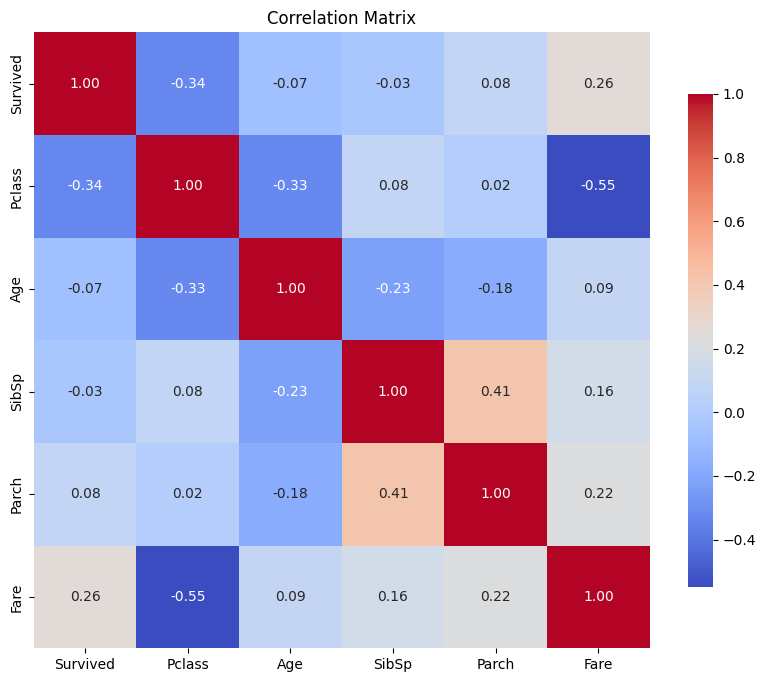

In [102]:
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [103]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 📊 Data Visualization

In [104]:
df2.Survived.value_counts()
df2.Survived.value_counts(normalize=True)

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

#### 61% and 39% is moderately imbalanced but it's not very biased. this is common and expected in real world datasets like titanic disaster(because many of the people died)

Text(0.5, 1.0, 'Count of Survived vs Not Survived')

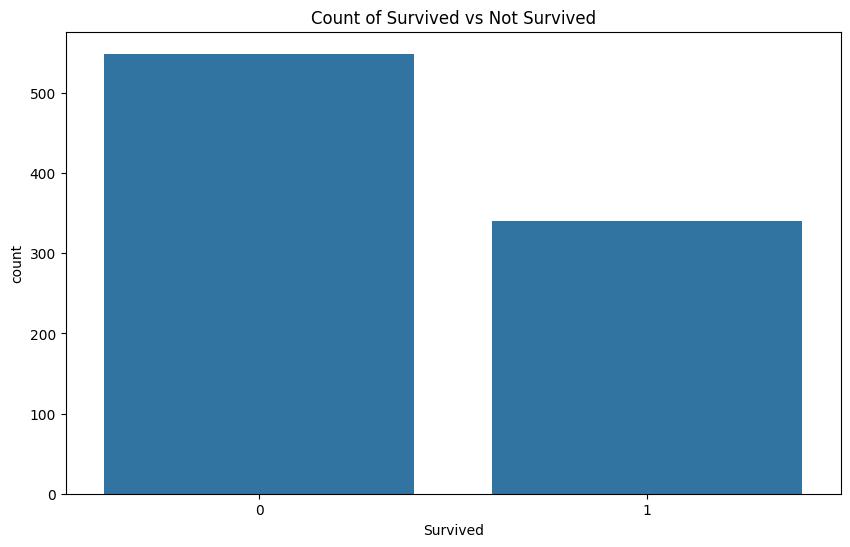

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df2,)
plt.title('Count of Survived vs Not Survived')

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\2594412678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.Sex = df2.Sex.apply(lambda x: 1 if x == 'male' else 0)


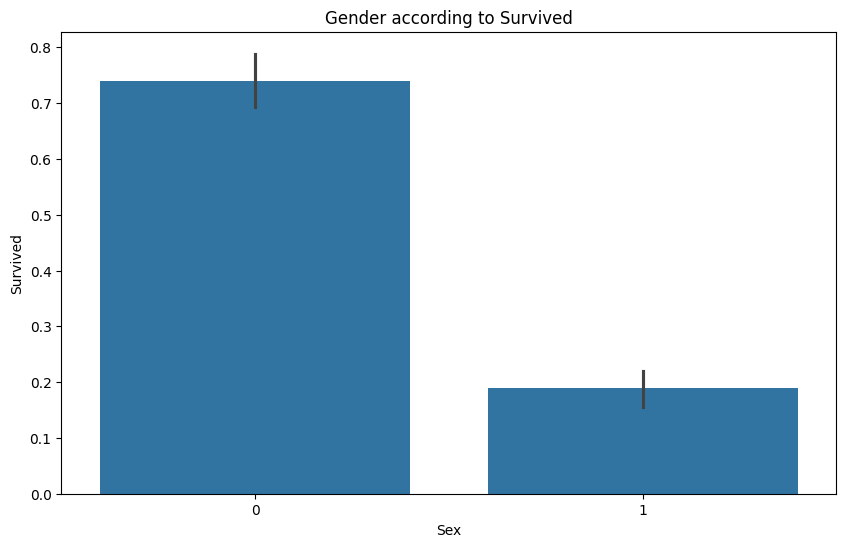

In [106]:
df_plot = df2 
df_plot.Sex = df2.Sex.apply(lambda x: 1 if x == 'male' else 0)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df2)
plt.title('Gender according to Survived')
plt.show()

In [107]:
df_sex = df2[['Survived', 'Sex']]
df_sex_survived = df_sex[df_sex['Survived'] == 1]
df_sex_survived.value_counts(normalize=True)

Survived  Sex
1         0      0.679412
          1      0.320588
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Passenger Class according to Survived')

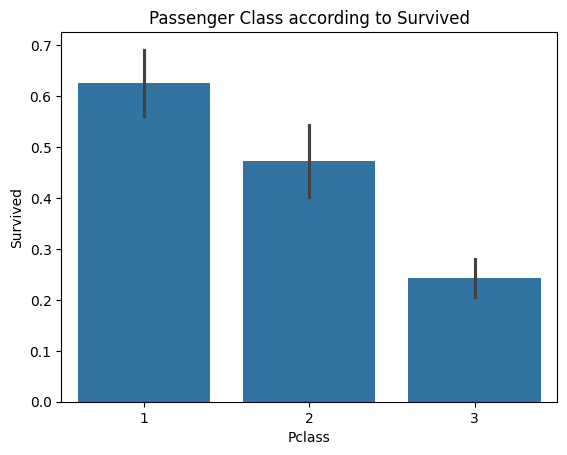

In [108]:
sns.barplot(x='Pclass', y='Survived', data=df2)
plt.title('Passenger Class according to Survived')

In [109]:
df_pclass = df2[['Survived', 'Pclass']]
df_pclass_survived = df_pclass[df_pclass['Survived'] == 1]
df_pclass_survived.value_counts(normalize=True)

Survived  Pclass
1         1         0.394118
          3         0.350000
          2         0.255882
Name: proportion, dtype: float64

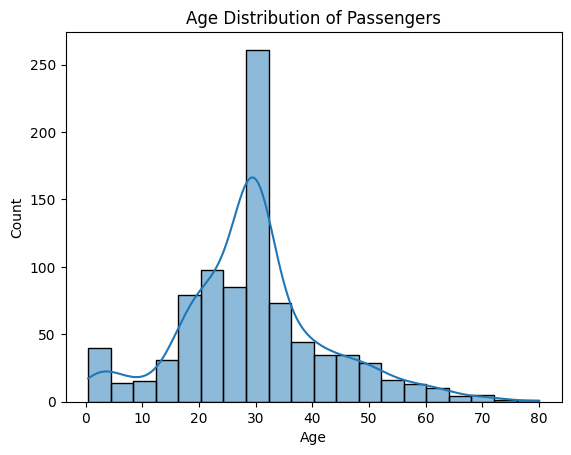

In [110]:
sns.histplot(x='Age', data=df2, bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.show() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\1525252340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.Embarked = df_plot.Embarked.apply(lambda x: 1 if x == 'C' else (2 if x == 'Q' else 3))


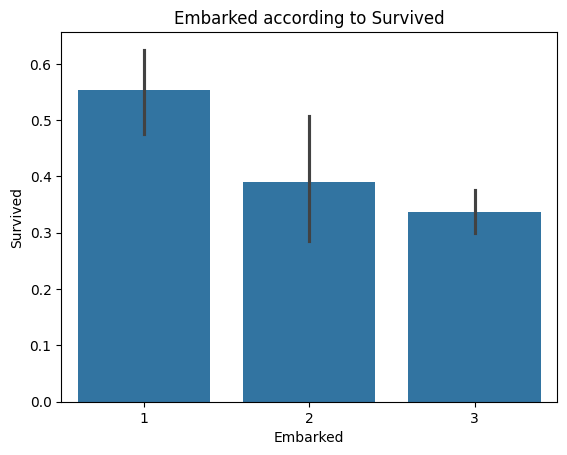

In [111]:
df_plot = df2  
df_plot.Embarked = df_plot.Embarked.apply(lambda x: 1 if x == 'C' else (2 if x == 'Q' else 3))

sns.barplot(x='Embarked', y='Survived', data=df2)
plt.title('Embarked according to Survived') 
plt.show()

### ⚙️ Feature Selection and Engineering

In [112]:
df2.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3


In [113]:
# family size feature creation
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1    # adding 1 to include the passenger themselves
df2.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\3481866833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1    # adding 1 to include the passenger themselves


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,3,2
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,3,1
3,1,1,0,35.0,1,0,53.1000,3,2
4,0,3,1,35.0,0,0,8.0500,3,1


In [114]:
df2['IsAlone'] = df2['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
df2.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\3575095085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['IsAlone'] = df2['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,3,2,0
1,1,1,0,38.0,1,0,71.2833,1,2,0
2,1,3,0,26.0,0,0,7.9250,3,1,1
3,1,1,0,35.0,1,0,53.1000,3,2,0
4,0,3,1,35.0,0,0,8.0500,3,1,1


In [115]:
df2['Person_type'] = df2.Age.apply(lambda x: 'Child' if x < 18 else 'Adult')
df2.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\1233457058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Person_type'] = df2.Age.apply(lambda x: 'Child' if x < 18 else 'Adult')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Person_type
0,0,3,1,22.0,1,0,7.2500,3,2,0,Adult
1,1,1,0,38.0,1,0,71.2833,1,2,0,Adult
2,1,3,0,26.0,0,0,7.9250,3,1,1,Adult
3,1,1,0,35.0,1,0,53.1000,3,2,0,Adult
4,0,3,1,35.0,0,0,8.0500,3,1,1,Adult


In [116]:
df2.Fare.describe() 

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [117]:
upper_limit = df2.Fare.mean() + 3 * df2.Fare.std()
lower_limit = df2.Fare.mean() - 3 * df2.Fare.std()
df2 = df2[(df2.Fare < upper_limit) & (df2.Fare > lower_limit)]
df2.shape 

(869, 11)

In [118]:
df2.Fare.value_counts() 

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 239, dtype: int64

In [119]:
df3 = df2 
# df3.Fare = df3.Fare.replace({'low': 0, 'medium': 1, 'high': 2})
df3.Person_type = df3.Person_type.replace({'Child': 0, 'Adult': 1})
df3.head() 

C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\1070052913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.Person_type = df3.Person_type.replace({'Child': 0, 'Adult': 1})
C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\1070052913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Person_type = df3.Person_type.replace({'Child': 0, 'Adult': 1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Person_type
0,0,3,1,22.0,1,0,7.2500,3,2,0,1
1,1,1,0,38.0,1,0,71.2833,1,2,0,1
2,1,3,0,26.0,0,0,7.9250,3,1,1,1
3,1,1,0,35.0,1,0,53.1000,3,2,0,1
4,0,3,1,35.0,0,0,8.0500,3,1,1,1


In [120]:
df3.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Person_type    0
dtype: int64

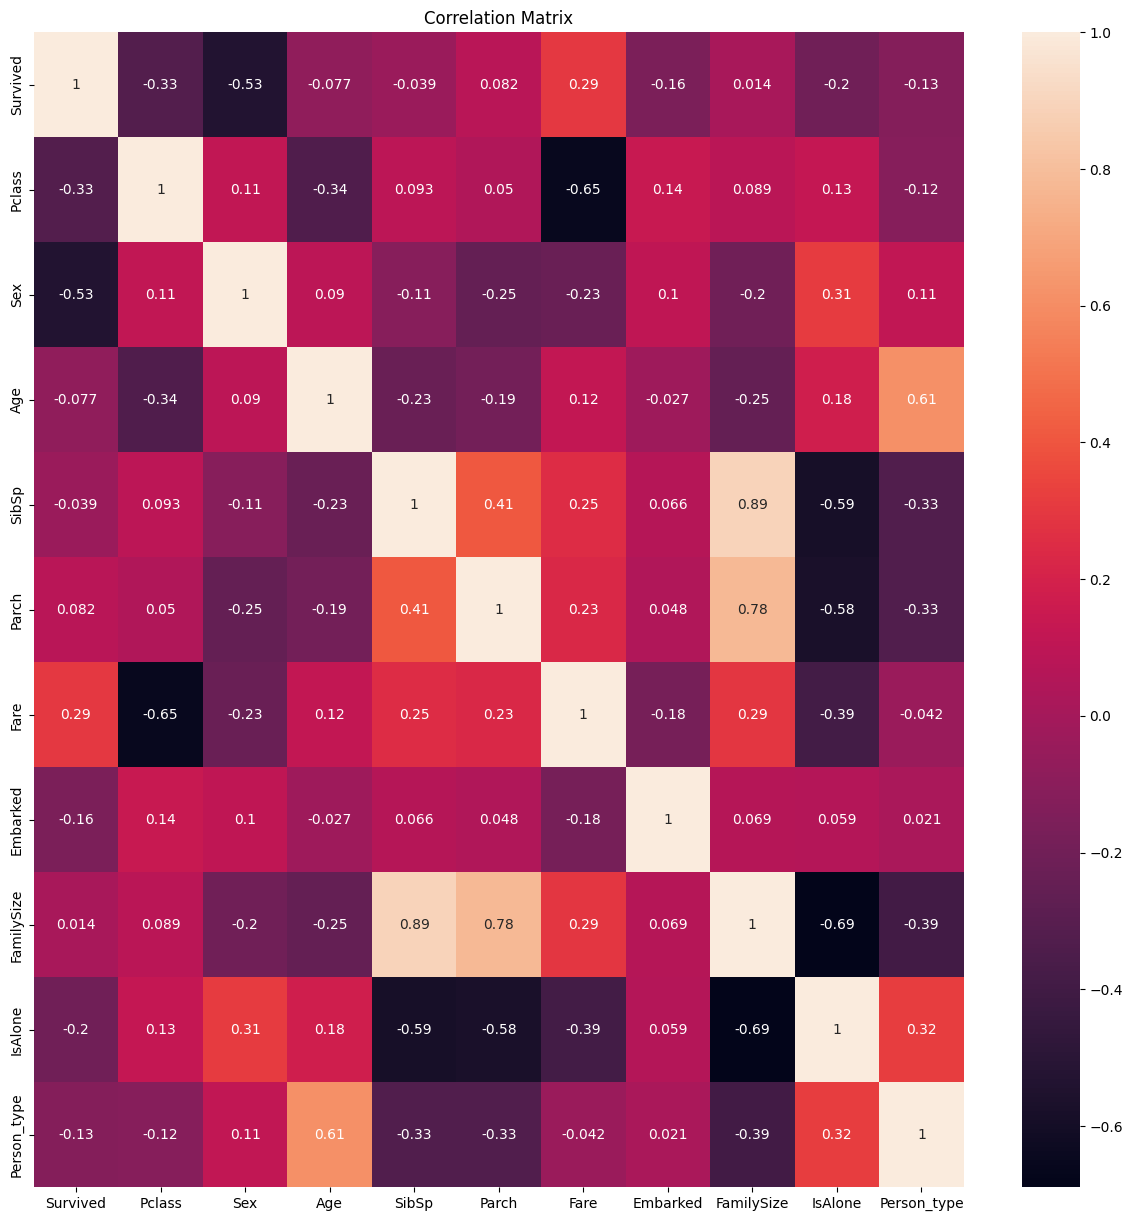

In [121]:
corr = df3.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True)
plt.show() 

In [122]:
df4 = df3.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
df4.head() 

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Person_type
0,0,3,1,22.0,7.2500,3,0,1
1,1,1,0,38.0,71.2833,1,0,1
2,1,3,0,26.0,7.9250,3,1,1
3,1,1,0,35.0,53.1000,3,0,1
4,0,3,1,35.0,8.0500,3,1,1


In [123]:
df4.describe() 

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Person_type
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.375144,2.341772,0.654776,29.621997,26.407110,2.552359,0.607595,0.871116
std,0.484439,0.819895,0.475715,12.989714,29.272414,0.779096,0.488567,0.335264
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,2.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,13.858300,3.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,30.000000,3.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,164.866700,3.000000,1.000000,1.000000


C:\Users\madhu\AppData\Local\Temp\ipykernel_11468\2012808402.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', data=df4, palette='Set2')


Text(0.5, 1.0, 'Age according to Survived')

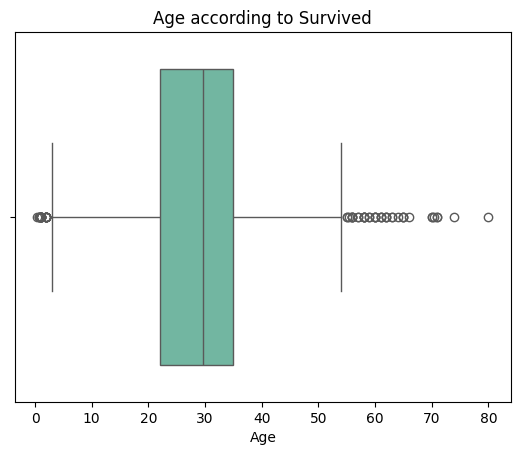

In [124]:
sns.boxplot(x='Age', data=df4, palette='Set2')
plt.title('Age according to Survived')

<Axes: xlabel='Fare'>

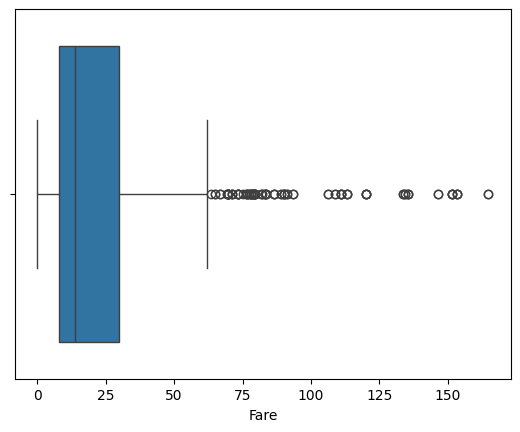

In [125]:
sns.boxplot(x='Fare', data=df4)

In [126]:
df4.shape 

(869, 8)

In [180]:
df4.Fare.describe() 

count    869.000000
mean      26.407110
std       29.272414
min        0.000000
25%        7.895800
50%       13.858300
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

### 🛠️ Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X = df4.drop('Survived', axis=1)
y = df4['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [178]:
X.head() 

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Person_type
0,3,1,22.0,7.2500,3,0,1
1,1,0,38.0,71.2833,1,0,1
2,3,0,26.0,7.9250,3,1,1
3,1,0,35.0,53.1000,3,0,1
4,3,1,35.0,8.0500,3,1,1


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

In [130]:
# finding the best model using GridSearchCV
def find_best_model(X, y): 
    models = {
        'logistic_regression': { 
            'model': LogisticRegression(max_iter=1000), 
            'params': {
                'C': [0.1, 1, 10], 
                'solver': ['liblinear', 'saga']
            }
        },
        'SVC': { 
            'model': SVC(), 
            'params': {
                'C': [0.1, 1, 10], 
                'kernel': ['linear', 'rbf']
            }
        },
        'decision_tree': { 
            'model': DecisionTreeClassifier(), 
            'params': {
                'max_depth': [None, 5, 10], 
                'min_samples_split': [2, 5, 10]
            }
        },
        'random_forest': { 
            'model': RandomForestClassifier(), 
            'params': {
                'n_estimators': [10, 50, 100], 
                'max_depth': [None, 5, 10], 
                'min_samples_split': [2, 5, 10]
            }
        }, 
        'knn': { 
            'model': KNeighborsClassifier(), 
            'params': {
                'n_neighbors': [3, 5, 7], 
                'weights': ['uniform', 'distance']
            }
        }
    }
    
    scores = [] 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42) 
    for model_name, model in models.items(): 
        gs = GridSearchCV(model['model'], model['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name, 
            'best_score': gs.best_score_, 
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores)

In [131]:
find_best_model(X, y)

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: Conve

,model,best_score,best_params
0,logistic_regression,0.759538,"{'C': 10, 'solver': 'liblinear'}"
1,SVC,0.747977,"{'C': 0.1, 'kernel': 'linear'}"
2,decision_tree,0.795376,"{'max_depth': 10, 'min_samples_split': 10}"
3,random_forest,0.809249,"{'max_depth': None, 'min_samples_split': 10, '..."
4,knn,0.713295,"{'n_neighbors': 7, 'weights': 'distance'}"


In [132]:
scores = find_best_model(X, y)
scores 

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: Conve

,model,best_score,best_params
0,logistic_regression,0.759538,"{'C': 10, 'solver': 'liblinear'}"
1,SVC,0.747977,"{'C': 0.1, 'kernel': 'linear'}"
2,decision_tree,0.793064,"{'max_depth': 10, 'min_samples_split': 10}"
3,random_forest,0.813873,"{'max_depth': None, 'min_samples_split': 10, '..."
4,knn,0.713295,"{'n_neighbors': 7, 'weights': 'distance'}"


In [133]:
scores['best_params'][3]

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}

In [174]:
# Random Forest Classifier with best parameters
rf_clf = RandomForestClassifier(criterion='gini', n_estimators=100, min_samples_split=10, max_depth=5) 
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_split=10)

In [175]:
rf_clf.score(X_test, y_test)

0.8034682080924855

In [157]:
rf_clf.score(X_train, y_train) 

0.8577648766328012

In [158]:
# bagging classifier with Random Forest as base estimator
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    estimator=rf_clf,
    n_estimators=100,
    max_samples=0.8,
    oob_score=True
)

bagging_clf.fit(X_train, y_train)


BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_samples=0.8, n_estimators=100, oob_score=True)

In [176]:
bagging_clf.score(X_test, y_test)

0.8092485549132948

In [ ]:
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(bagging_clf, X, y, cv=cv).mean() 

# 0.78 cross val score is not so much vary from the actual model's performance. so we can assume that there is no overfitting in the model

np.float64(0.7895953757225433)

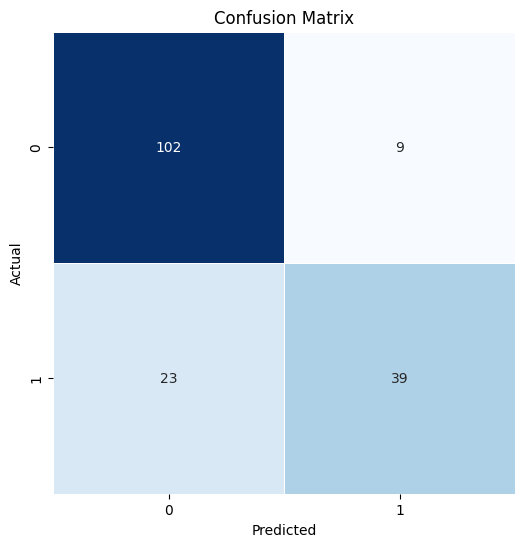

In [140]:
# confusion matrix
from sklearn.metrics import confusion_matrix 

y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [181]:
# save model to pickle file 
import pickle 

with open('titanic_survival_prediction_model.pkl', 'wb') as f: 
    pickle.dump(bagging_clf, f) 